# Can we predict music's popularity using classification and/or regression algorithms?

The aim of this project is to determine whether it is possible to predict with high precision how popular a song would be based purely on the song's demographics. Some of the criteria that will be used in evaluating this question are music loudness, acousticness, danceability, duration, etc. Multiple classification models will be used, scored, tuned and then compared to one another to determine what is the best model to determine a song's popularity going forward.



## 01 Introduction

I have a very personal relationship to music and am very interested in the music industry itself (i.e. what are some of the driving forces behind certain songs being popular) so I thought that it would be really interesting to see what are some of the key features that make certain song more popular than others. Since my perception of what popopular music is might actually turn out to be different from what the data suggests. 

My understanding is that music that is popular tends to be linked primarily to a certain set of rhythmic patterns, RPMs, etc. Meaning, the intrinsic characteristics of a song itself typically defines what makes that specific song to be popular. The approach this project will take will be to use 4 different models, 2 of them classification/clustering models and 2 of them regression models to understand what determines the popularity of songs. 

### Variables and data description
This spotify database has over 160K songs and the following numerical and non-numerical values. The variable we will be using as our dependable variable is 'popularity'.
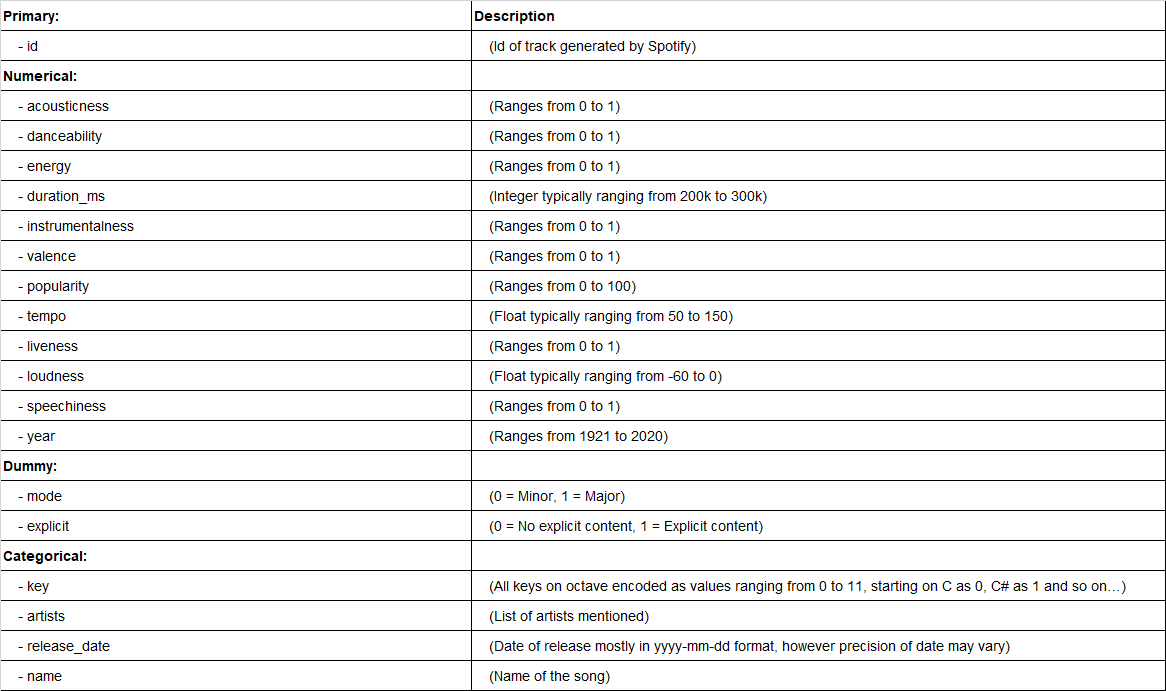


## 02 Import Relevant Modules

In [1]:
# import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell #This package and the command below allow for the Jupyter notebook
#to print all the outputs and NOT just the final row
InteractiveShell.ast_node_interactivity = "all" #this command allows all outputs to be printed, not just the last command

## 03 Data Wrangling
This dataset comes directly from Kaggle and can be found by using the following link https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [2]:
# import the spotify dataset
df = pd.read_csv(r'C:\Users\MarceloFuentes\Documents\Springboard\Research Project - Spotify Data\spotify_archive\data.csv')

In [3]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

Based on quick observation this data is quite clean, however the one column that might need a bit of cleaning up is the "artists" field. However, since the purpose of this analysis will be to use numerical data, one-hot encoding every single artist would create an overfitted model, therefore we will bypass this step and work without cleaning this data set any further.  

## 04 Exploratory Data Analysis
In this section we will look at the numerical features in our database along with some of the correlations some of these variables have between one another. 

In [4]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

We will perform a count of unique artists in this database along with a count of unique songs to determine whether they are variables that could be used in our study.

In [5]:
# Perform a count of unique artists in the dataset
unique_artists = df['artists'].unique()
unique_artists = [x for x in unique_artists]
unique_artists = pd.DataFrame(unique_artists)
len(unique_artists)
len(df)
songs_per_artist = int(len(df)/len(unique_artists))
print('This list has '+str(len(df))+' songs and there is approximately '+str(songs_per_artist)+' songs per artist.')

34088

170653

This list has 170653 songs and there is approximately 5 songs per artist.


We will be plotting a series of correlation matrices to understand what are some of the key relationships between popularity and the rest of the variables. 

<Figure size 864x720 with 0 Axes>

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

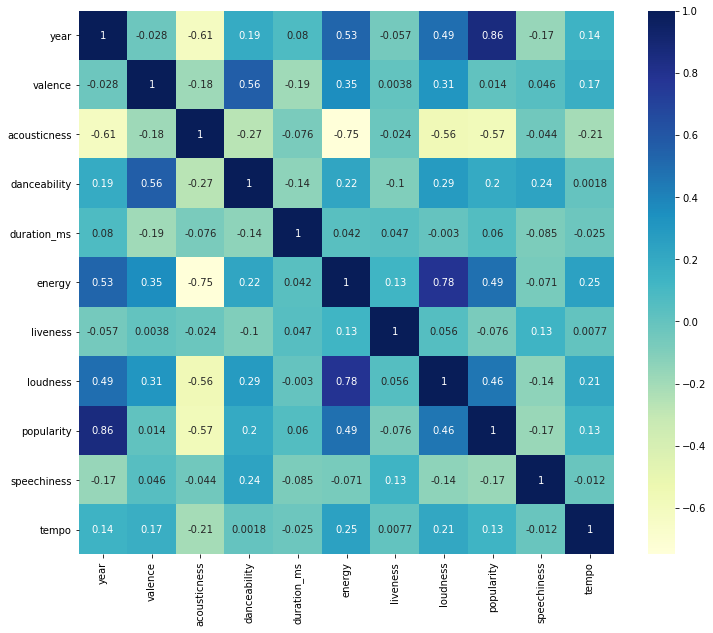

In [6]:
#Correlation matrix for variables, first make a smaller dataframe with numerical values only
plt.figure(figsize=(12,10))
df.columns
df_for_corr_matrix = df[['year','valence','acousticness','danceability',
       'duration_ms', 'energy','liveness', 'loudness','popularity',
       'speechiness', 'tempo']]
corr = df_for_corr_matrix.corr()
ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)

<Figure size 864x720 with 0 Axes>

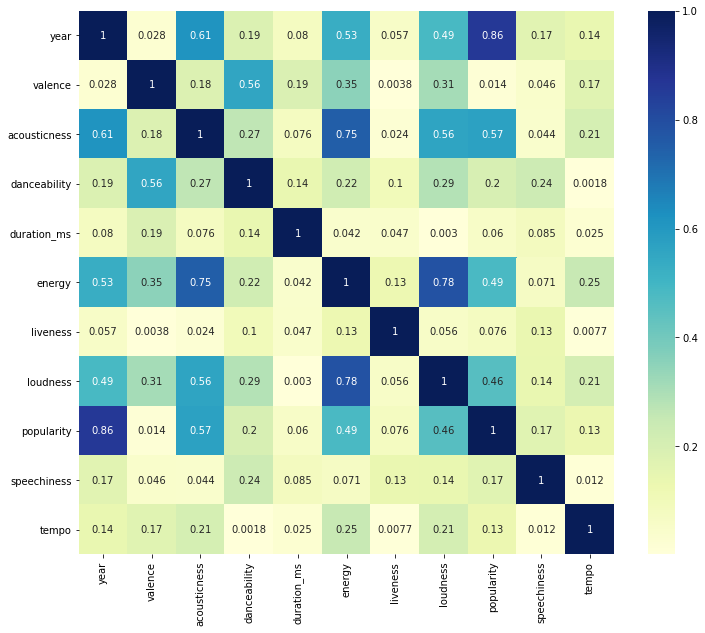

In [7]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(abs(corr),cmap="YlGnBu", annot=True)

## Findings on correlation matrix
Based on this graph, some of the variables that appear to have the highest level of correlations are:

1) Energy and Acousticness = ~ -(0.75)

2) Energy and Loudness = ~ 0.78

3) Loudness and Acousticness = ~ (0.56)

4) Popularity and Acousticness = ~ (0.57)

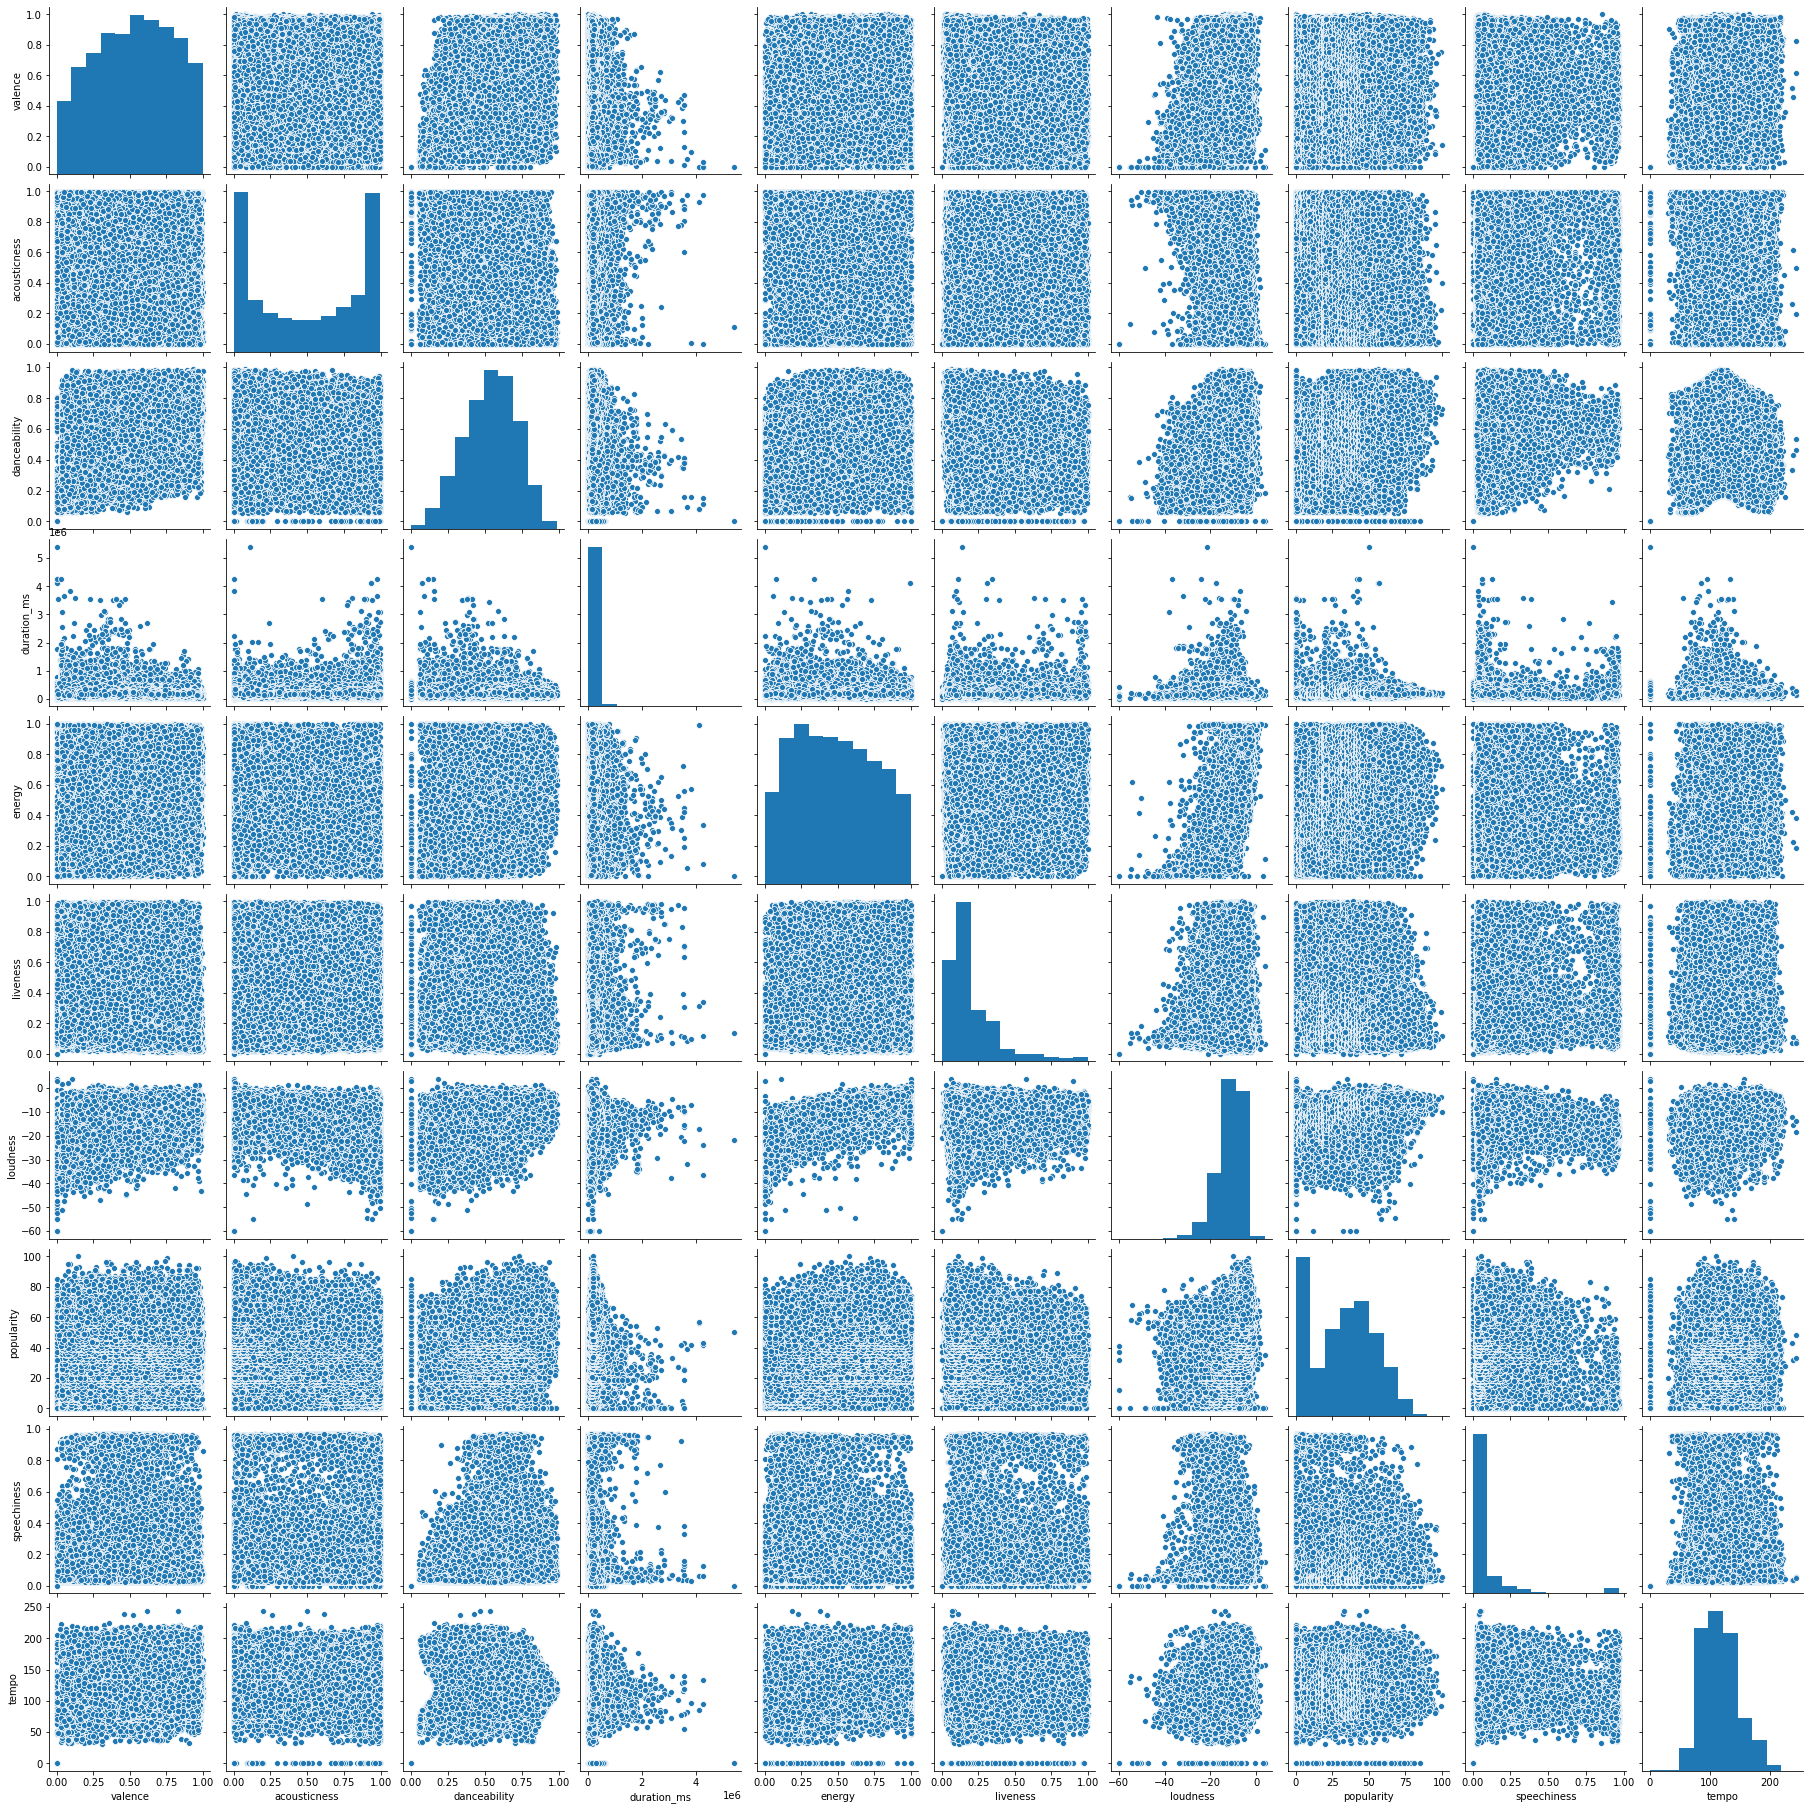

In [8]:
sns.pairplot(df_for_corr_matrix)

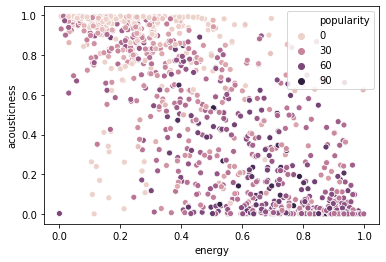

In [9]:
#Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['energy'] = df['energy']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='energy', hue='popularity')

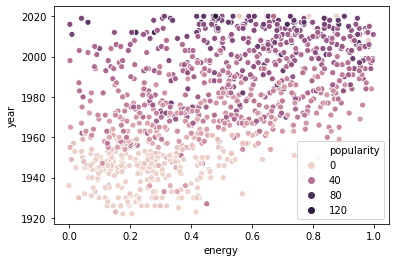

In [8]:
#Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['year'] = df['year']
df_scatter['popularity'] = df['popularity']
df_scatter['energy'] = df['energy']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='year', x='energy', hue='popularity')

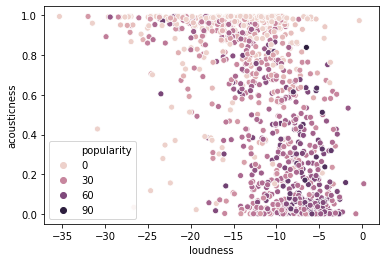

In [10]:
# Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='loudness', hue='popularity')

# Insights so far
- Music popularity typically decreases the higher the music's acousticness and increases with lower acousticness
- Lower levels of loudness are also associated with more popular music and the louder the music the lower the popularity

Text(0.5, 0, '$loudness$')

Text(0.5, 0, '$acousticness$')

Text(0.5, 0, '$popularity$')

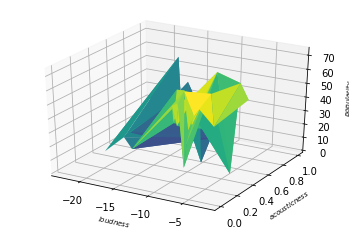

In [11]:
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['acousticness'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$acousticness$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

Text(0.5, 0, '$loudness$')

Text(0.5, 0, '$energy$')

Text(0.5, 0, '$popularity$')

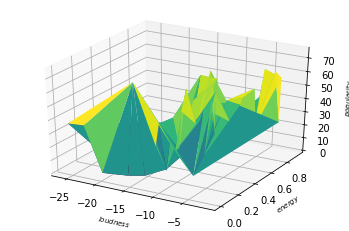

In [12]:
df_scatter = pd.DataFrame()
df_scatter['energy'] = df['energy']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['energy'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$energy$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

As a final step we will plot the average and median song popularity which we will use to determine popular vs. unpopular music later on if and when we decide to use regression models 

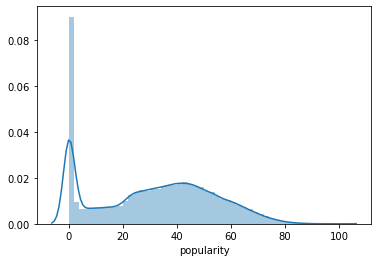

In [13]:
ax = sns.distplot(pd.to_numeric(df['popularity']))

In [14]:
from scipy import stats
median_pop = np.median(df['popularity'])
mean_pop = np.mean(df['popularity'])
print('The median popularity is '+str(int(median_pop)))
print('The mean popularity is '+str(int(mean_pop)))

The median popularity is 33
The mean popularity is 31


# Conclusions from EDA
Based on the graph above there is incontrovertible evidence that we would be able to use a combination of variables to forecast the popularity of different songs using variables such as energy, loudness and acousticness which have very high correlations with the popularity variable.  

## 05 Preprocessing & Feature Engineering
We will the create a new popularity variable using the quintiles of the popularity variable, then bucketing each item into a separate quintile ordinal (from 1 to 5). We will then use this new variable to run both of our classification models and ordinary multiple regression model. After running both classification models and the vanilla multiple regression, we will use the top 2 quintiles labeling them as "popular" and the bottom 3 as "inpopular/not popular" to run a logistic regression model.

In [15]:
#First we will create a new variable that is more discrete to bins the popularity ranges. Based on our distribution above
#we can split it based on quintiles using pandas cut function
bottom_00 = df['popularity'].quantile(0.0)
bottom_20 = df['popularity'].quantile(0.2)
bottom_40 = df['popularity'].quantile(0.4)
bottom_60 = df['popularity'].quantile(0.6)
bottom_80 = df['popularity'].quantile(0.8)
bottom_100 = df['popularity'].quantile(1)
print("The minimum value is "+str(bottom_00))
print("The bottom quintile has a value of "+str(bottom_20))
print("The 2nd bottom quintile has a value of "+str(bottom_40))
print("The 2nd top quintile has a value of "+str(bottom_60))
print("The 1st top quintile has a value of "+str(bottom_80))
print("The maximum value is "+str(bottom_100))

The minimum value is 0.0
The bottom quintile has a value of 4.0
The 2nd bottom quintile has a value of 27.0
The 2nd top quintile has a value of 39.0
The 1st top quintile has a value of 51.0
The maximum value is 100.0


In [16]:
df['quantile_popularity'] = pd.qcut(df['popularity'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df['quantile_popularity'] = df['quantile_popularity']+1
print(df[['popularity','quantile_popularity']].sample(30))

        popularity  quantile_popularity
132857          22                    2
54561           64                    5
74319           72                    5
76873            0                    1
123979          59                    5
13525           51                    4
24888            8                    2
116764          24                    2
3350             0                    1
38717            1                    1
57634            0                    1
135270          37                    3
33056           46                    4
109670           0                    1
5649            25                    2
115030          29                    3
41672            0                    1
89107           42                    4
52843           53                    5
107776          60                    5
87763           44                    4
22813            0                    1
27713           36                    3
51130           45                    4


Now are data has been broken down into quintiles and bucketed under its respectives tagging (i.e. 1 = bottom quintile, 2=2nd bottom quintile, 3=3rd bottom quintile, 4=2nd top quintile, 5=1st top quintile) 

In [17]:
#The next step is to get rid of our unneccesary variables
df_analysis = df[['valence', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'quantile_popularity']]
df_analysis.head()

valence  year  acousticness  danceability  duration_ms  energy  explicit  \
0   0.0594  1921         0.982         0.279       831667   0.211         0   
1   0.9630  1921         0.732         0.819       180533   0.341         0   
2   0.0394  1921         0.961         0.328       500062   0.166         0   
3   0.1650  1921         0.967         0.275       210000   0.309         0   
4   0.2530  1921         0.957         0.418       166693   0.193         0   

   instrumentalness  liveness  loudness  mode  speechiness    tempo  \
0          0.878000     0.665   -20.096     1       0.0366   80.954   
1          0.000000     0.160   -12.441     1       0.4150   60.936   
2          0.913000     0.101   -14.850     1       0.0339  110.339   
3          0.000028     0.381    -9.316     1       0.0354  100.109   
4          0.000002     0.229   -10.096     1       0.0380  101.665   

   quantile_popularity  
0                    1  
1                    2  
2                    2  
3                    1  
4                    1

We will now split our data into training and test groups to use them into each one of our models

In [117]:
# Now we can split our data into training and test groups
from sklearn.model_selection import train_test_split
X = df_analysis.loc[:, df_analysis.columns != 'quantile_popularity']
y = df_analysis['quantile_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 06 Model evaluation

### 06_01 K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

<Figure size 864x360 with 0 Axes>

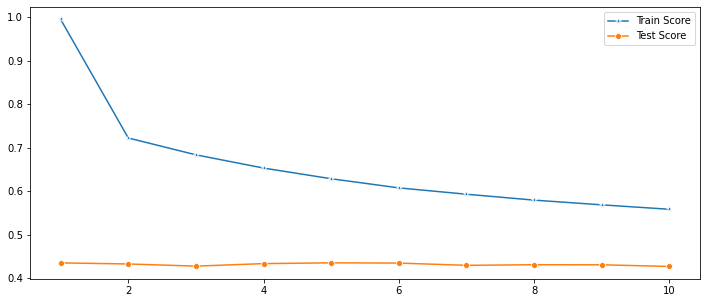

In [20]:
# Plot the model performance based on the number of neighbors
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,11),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,11),test_scores,marker='o',label='Test Score')

In [21]:
# Based on the graph above we will decide to use 10 neighbors for this analysis
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Based on the graph above the best performance is shown by the model with 10 nearest neighbors, therefore we will calculate this model using the parameter n_neighbors=10.

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[4831 1604  411  175   82]
 [1941 2985 1303  524  133]
 [ 611 1836 1968 1365  680]
 [ 376 1084 1661 2007 1701]
 [ 187  555 1171 2162 2778]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.68013515 0.22582008 0.05786287 0.02463748 0.01154442]
 [0.28187627 0.43348824 0.18922451 0.07609643 0.01931455]
 [0.09458204 0.28421053 0.30464396 0.21130031 0.10526316]
 [0.05505931 0.15873481 0.24322741 0.29389369 0.24908479]
 [0.02728732 0.08098643 0.17087407 0.31548227 0.40536991]]


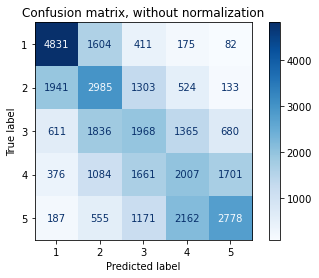

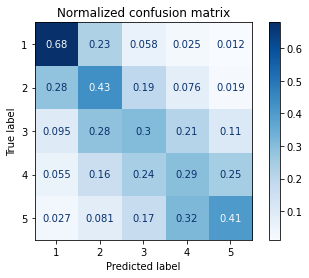

In [23]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.68      0.64      7103
           2       0.37      0.43      0.40      6886
           3       0.30      0.30      0.30      6460
           4       0.32      0.29      0.31      6829
           5       0.52      0.41      0.45      6853

    accuracy                           0.43     34131
   macro avg       0.42      0.42      0.42     34131
weighted avg       0.43      0.43      0.42     34131



The accuracy of this model is around 43% which is not a great figure to start with. However, hopefully after we perform some hyperparameter tuning we can bring this figure a bit higher for this specific model. 

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.4219207587168047
Best Parameters: {'n_neighbors': 5}


After performing a GridSearch the model appears to show that the best parameter is 5 nearest neighbors and the best score possible is 0.42. So far this model might not be the top choice.

(array([[7103., 6886., 6460., 6829., 6853.],
        [7926., 8002., 6794., 6154., 5255.]]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Random Forest y_test vs y_pred')

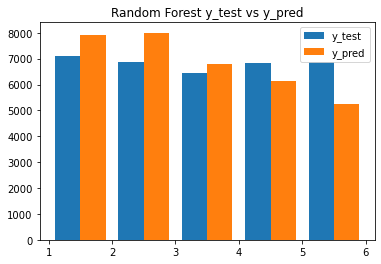

In [27]:
y_pred = knn_cv.predict(X_test)
bins = [1,2,3,4,5,6]
colors = ['y_test','y_pred']
plt.hist([y_test,y_pred], bins=bins, stacked=False, label=colors)
plt.title("Random Forest y_test vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

Taking a look at the output from this model, it is overestimating the number of songs in the popularity ratings 1-3 and then under estimating the number of songs with ratings 4-5. Therefore, this model might not be the one best suited to tackle this issue. Specially when considering the accuracy of this model to be around 42% we might be able to find a better suited model for our desired forecast.

### 06_02 Random Forest Classifier

In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier

In [119]:
# Scale the data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [121]:
clf = RandomForestClassifier()
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.634
Random Forest: f1-score=0.634


In [124]:
#variables for hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [2, 10, 100],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': np.arange(2, 6),
    'min_samples_split': np.arange(2, 6)
}


gscv = RandomizedSearchCV(clf, param_grid, cv=3, scoring='precision_macro')
gscv.fit(X_train_scaled, y_train)

print('Best Random Forst Classifier Parameters:')
print(gscv.best_params_)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 10, 100],
                                        'min_samples_leaf': array([2, 3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': [50, 100, 200]},
                   scoring='precision_macro')

Best Random Forst Classifier Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


In [128]:
clf = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 4, max_depth= 10)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.637
Random Forest: f1-score=0.637


(array([[7103., 6886., 6460., 6829., 6853.],
        [7953., 6067., 8930., 6386., 4795.]]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Random Forest y_test vs y_pred')

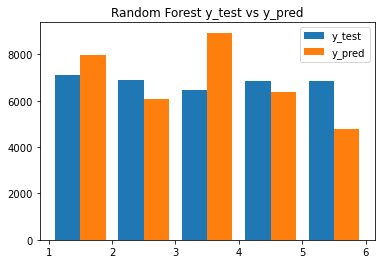

In [129]:
bins = [1,2,3,4,5,6]
colors = ['y_test','y_pred']
plt.hist([y_test,y_pred], bins=bins, stacked=False, label=colors)
plt.title("Random Forest y_test vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

### Plot Feature Importances

13


13

<Figure size 720x720 with 0 Axes>

<BarContainer object of 13 artists>

([<matplotlib.axis.YTick at 0x1e70725d460>,
 [Text(0, 0, 'explicit'),
  Text(0, 0, 'mode'),
  Text(0, 0, 'instrumentalness'),
  Text(0, 0, 'liveness'),
  Text(0, 0, 'tempo'),
  Text(0, 0, 'valence'),
  Text(0, 0, 'danceability'),
  Text(0, 0, 'speechiness'),
  Text(0, 0, 'duration_ms'),
  Text(0, 0, 'energy'),
  Text(0, 0, 'loudness'),
  Text(0, 0, 'acousticness'),
  Text(0, 0, 'year')])

Text(0.5, 0, 'Relative Importance')

Text(0.5, 1.0, 'Variable Importance')

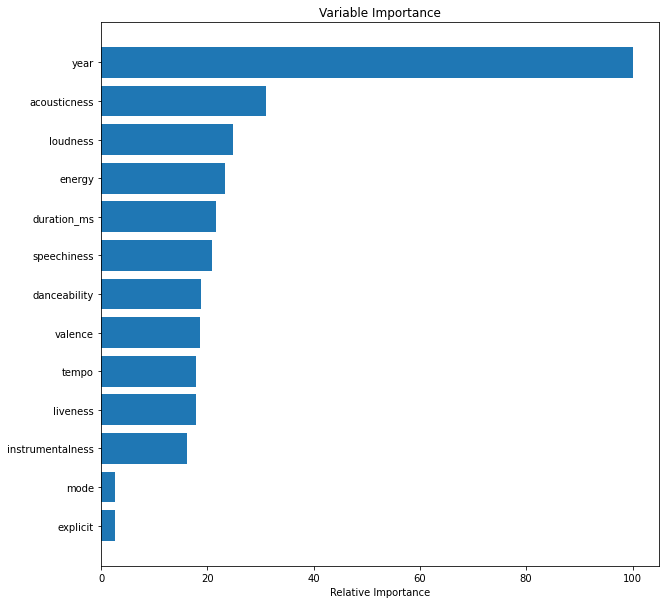

In [32]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Conclusions so far
The random forest classifier appears to perform better than k-NN, with 64% accuracy, additionally it appears the year in which a song is released is of great importance for the random forest classifier, which intuitively makes sense. Music tends to be most relevant and popular the more recent it is!

### 06_03 Logistic Regression
First I need to redefine the popularity variable to make it binomial (i.e. 1s and 0s) then I need to need to redefine my variables and scale them before running the logistic regression

In [33]:
# We need to redefine the popularity variable
# Recall - the popularity quintiles were as follows bottom 3 quintiles 1-3
# Top 2 quintiles 4-5. Therefore we will deem the top 2 quintiles as popular
# and the bottom 3 as nils
df['popular_or_not'] = pd.qcut(df['popularity'],
                            q=[.6, 1],
                            labels=False,
                            precision=0)
df['popular_or_not'] = df['popular_or_not'].replace(0, 1)
df['popular_or_not'] = df['popular_or_not'].fillna(0)
print(df[['popularity','quantile_popularity','popular_or_not']].sample(50))

        popularity  quantile_popularity  popular_or_not
96652           17                    2             0.0
127706           0                    1             0.0
34218           49                    4             1.0
86246           39                    3             1.0
25367            5                    2             0.0
15109           67                    5             1.0
71614           47                    4             1.0
20693            0                    1             0.0
163837          22                    2             0.0
133023          27                    2             0.0
22039            3                    1             0.0
90778           58                    5             1.0
151849          43                    4             1.0
145833          20                    2             0.0
66416           37                    3             0.0
61969            7                    2             0.0
39583            0                    1         

In [34]:
# The x values will remain the same but the X will come from "popular_or_not"
from sklearn.model_selection import train_test_split
X = df_analysis.loc[:, df_analysis.columns != 'quantile_popularity']
y = df['popular_or_not']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values,y.values,random_state=42)

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(Xlr)
X_train_scaled=scaler.transform(Xlr)
X_test_scaled=scaler.transform(Xtestlr)


clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train_scaled, ylr)
# Print the accuracy from the testing data.
print("The logistic regression accuracy score is "+
      str(accuracy_score(clf.predict(X_test_scaled), ytestlr)))

LogisticRegression()

The logistic regression accuracy score is 0.8415525970373149


The unoptimized logistic regression has an accuracy of around 84% which is quite high! However, we should note that this regression is using a simpler version of the data which is split between 1s and 0s. Therefore this model should be used noting that the output it different from the prior two.

In [36]:
# Use the function below for logistic regression optimization
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [37]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print("The logistic regression score without data scaling is "+str(score))

The logistic regression score without data scaling is 0.6362339421496452


The next step is to use different C values as arguments to find the ideal one that optimizes our model.

In [38]:
#the grid of parameters to search over
Cs = [0.01, 0.1, 1, 5, 7.5, 10, 100,]

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
best_score = 0

# your turn
for x in Cs:
    clf = LogisticRegression(C=x)
    score = cv_score(clf, X_train_scaled, ylr)
    print(x, score)
    if score > best_score:
        best_score = score
        ideal_x = x
        
print("The ideal C value is "+str(ideal_x)+" with a score of "+str(best_score))

0.01 0.8428067956741417
0.1 0.8428146048164809
1 0.8428536712841833
5 0.8428536715894186
7.5 0.8428536715894186
10 0.8428536715894186
100 0.8428458584790194
The ideal C value is 5 with a score of 0.8428536715894186


The ideal C value is 5 with a score of 84.29% in terms of accuracy. So far this is the highest score we have obtained after scaling the data!

In [39]:
logreg = LogisticRegression(C=5)
logreg.fit(X_train_scaled,ylr)
y_pred = logreg.predict(X_test_scaled)
print(logreg.score(X_test_scaled, ytestlr))

LogisticRegression(C=5)

0.8415525970373149


(array([[24902.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 17762.],
        [25228.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 17436.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Logistic Regression ytestlr vs y_pred')

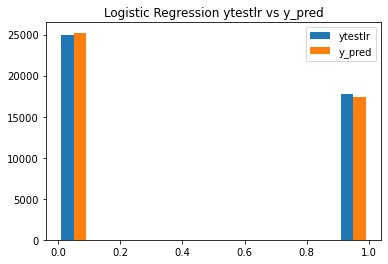

In [40]:
colors = ['ytestlr','y_pred']
plt.hist([ytestlr,y_pred], stacked=False, label=colors)
plt.title("Logistic Regression ytestlr vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

In [41]:
# feature importance for logistic regression
feature_names = X_train.columns
importance = clf.fit(X_train_scaled, ylr).coef_[0]
#summarize feature importance
for i, v in enumerate(importance):
    print('Feature: '+feature_names[i]+' Score: %.5f' % (v))

Feature: valence Score: 0.03734
Feature: year Score: 2.65311
Feature: acousticness Score: 0.01034
Feature: danceability Score: -0.00915
Feature: duration_ms Score: 0.00599
Feature: energy Score: -0.19850
Feature: explicit Score: 0.10141
Feature: instrumentalness Score: -0.16017
Feature: liveness Score: -0.09468
Feature: loudness Score: 0.30227
Feature: mode Score: -0.04325
Feature: speechiness Score: -0.26754
Feature: tempo Score: -0.02020


Similar to the prior models, the most important feature is the year! Again, this does not come to us as a surprise since more recent songs are likely to be more popular, yet it is interesting to see that this variable is consistently important!

### 06_04 Multiple Regression (Ordinary Least Squares)

In [42]:
# Now we can split our data into training and test groups
from sklearn.model_selection import train_test_split
X = df_analysis.loc[:, df_analysis.columns != 'quantile_popularity']
y = df_analysis['quantile_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
# we will scale the data using the standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [64]:
# Set up my cumulative loss function
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

clf = sm.OLS(y_train, X_train_scaled)
# Fit the model on the trainng data.
clf_res = clf.fit()
# Print the accuracy from the testing data.
y_pred = clf_res.predict(X_test_scaled)
clf_res.summary()

correlation_matrix = np.corrcoef(y_pred, y_test)
correlation_y_pred_y_test = correlation_matrix[0,1]
r_squared = correlation_y_pred_y_test**2

print("The overall accuracy of the linear regression model is "+str(r_squared))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     quantile_popularity   R-squared (uncentered):                   0.133
Model:                             OLS   Adj. R-squared (uncentered):              0.133
Method:                  Least Squares   F-statistic:                              1610.
Date:                 Tue, 12 Jan 2021   Prob (F-statistic):                        0.00
Time:                         19:58:39   Log-Likelihood:                     -3.4704e+05
No. Observations:               136522   AIC:                                  6.941e+05
Df Residuals:                   136509   BIC:                                  6.942e+05
Df Model:                           13                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0066      0.012      0.553      0.580      -0.017       0.030
x2             1.1136      0.012     92.994      0.000       1.090       1.137
x3            -0.0810      0.015     -5.580      0.000      -0.109      -0.053
x4             0.0276      0.012      2.360      0.018       0.005       0.050
x5            -0.0007      0.009     -0.083      0.934      -0.018       0.016
x6            -0.0330      0.019     -1.779      0.075      -0.069       0.003
x7             0.0096      0.010      0.978      0.328      -0.010       0.029
x8            -0.0713      0.010     -7.350      0.000      -0.090      -0.052
x9            -0.0366      0.009     -4.196      0.000      -0.054      -0.019
x10            0.0241      0.015      1.619      0.105      -0.005       0.053
x11           -0.0069      0.008     -0.827      0.408      -0.023       0.010
x12           -0.0661      0.010     -6.410      0.000      -0.086      -0.046
x13            0.0010      0.009      0.109      0.914      -0.016       0.018
==============================================================================
Omnibus:                    10306.446   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57995.909
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       6.190   Cond. No.                         5.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall accuracy of the linear regression model is 0.7257776446678014


In [88]:
# This way we can visualize the variables in question.
# We should features x5, x7, x11, x13
# We should drop duration_ms, explicit, mode, tempo and rerun the regression  
feature_names = X_train.columns
feature_names = [j for j in feature_names]
feature_names = pd.DataFrame(feature_names,columns=['Feature'])
feature_names['feature_number'] = feature_names.index + 1
feature_names.head(14)

Feature  feature_number
0            valence               1
1               year               2
2       acousticness               3
3       danceability               4
4        duration_ms               5
5             energy               6
6           explicit               7
7   instrumentalness               8
8           liveness               9
9           loudness              10
10              mode              11
11       speechiness              12
12             tempo              13

In [90]:
X_train.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo'],
      dtype='object')

In [93]:
# Now we can split our data into training and test groups
from sklearn.model_selection import train_test_split
X = df_analysis[['valence', 'year', 'acousticness', 'danceability','energy', 'instrumentalness', 
                'liveness', 'loudness', 'speechiness']]
y = df_analysis['quantile_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [94]:
# we will scale the data using the standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [109]:
# Set up my cumulative loss function
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

clf = sm.OLS(y_train, X_train_scaled)
# Fit the model on the trainng data.
clf_res = clf.fit()
# Print the accuracy from the testing data.
y_pred = clf_res.predict(X_test_scaled)
clf_res.summary()

correlation_matrix = np.corrcoef(y_pred, y_test)
correlation_y_pred_y_test = correlation_matrix[0,1]
r_squared = correlation_y_pred_y_test**2

print("The overall accuracy of the linear regression model is "+str(r_squared))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     quantile_popularity   R-squared (uncentered):                   0.133
Model:                             OLS   Adj. R-squared (uncentered):              0.133
Method:                  Least Squares   F-statistic:                              2326.
Date:                 Tue, 12 Jan 2021   Prob (F-statistic):                        0.00
Time:                         20:25:24   Log-Likelihood:                     -3.4704e+05
No. Observations:               136522   AIC:                                  6.941e+05
Df Residuals:                   136513   BIC:                                  6.942e+05
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0051      0.012      0.446      0.656      -0.017       0.028
x2             1.1156      0.012     94.540      0.000       1.092       1.139
x3            -0.0821      0.014     -5.689      0.000      -0.110      -0.054
x4             0.0293      0.011      2.564      0.010       0.007       0.052
x5            -0.0335      0.018     -1.813      0.070      -0.070       0.003
x6            -0.0705      0.010     -7.303      0.000      -0.089      -0.052
x7            -0.0366      0.009     -4.205      0.000      -0.054      -0.020
x8             0.0255      0.015      1.725      0.085      -0.003       0.055
x9            -0.0615      0.009     -6.549      0.000      -0.080      -0.043
==============================================================================
Omnibus:                    10324.864   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58418.872
Skew:                           0.067   Prob(JB):                         0.00
Kurtosis:                       6.202   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall accuracy of the linear regression model is 0.7257677948013015


(array([[   0.,    0., 7103.,    0., 6886.,    0., 6460.,    0., 6829.,
         6853.],
        [ 378.,    0., 5105.,    0., 7608.,    0., 8758.,    0., 9015.,
         3267.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Multiple Linear Regression y_test vs y_pred')

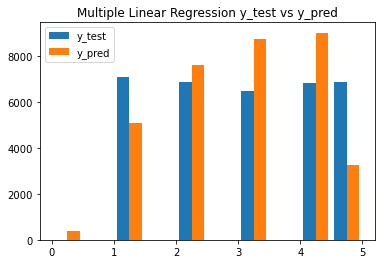

In [114]:
constant_to_add = 5 - y_pred.max()
y_pred = y_pred + constant_to_add
y_pred = np.round(y_pred)
colors = ['y_test','y_pred']
plt.hist([y_test,y_pred], stacked=False, label=colors)
plt.title("Multiple Linear Regression y_test vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

Seeing the distribution of the prediction versus the test data we can see that the overall performance of this model is also not as high as we first assumed and undeniably inferior to that of the logistic regresssion.

## 07 Conclusion & Findings
After fitting, evaluating, tuning and scoring 4 different models (1) k-Nearest Neighbors (2) Random Forest (3) Logistic Regression and (4) Linear Regression the model rankings are the following:

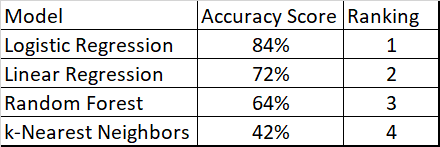

However, we should note that while the logistic regression was the most accurate of all models it is the model which has the highest level of bias and restriction since the output has to be binomial, while the rest of the models are able to model the results using the quintile bucketing system we had proposed in the feature engineering section.
Furthermore, it was interesting to see that the 'year' variable was such a strong determinant of popularity, even though this was to be expected given that 'new' music will typically become trendier/more popular than music that has existed throughout the years. 

## 08 Discussion & Further Studies 
After finalizing this study, an interesting analysis would be to group songs based on musical genre to test whether these trends/patterns hold within each individual music genre, since year is such a strong factor in determining music popularity for all models, testing this using music from different decades could be an interesting study to perform.
With that said, while the findings of my study were interesting for the purpose of selling music as a commodity (i.e. for a company such as Spotify), it would be interesting to perform a similar study using popular music without the year variable to assess what are some of the key chracteristics that make certain musical genres more popular than others since companies in the music production industry would in likely want to gather this knowledge in order to understand where it would be best to allocate their financial resources (i.e. what musicians to back).
